### **Задача 1**

Дана страница https://ru.wikipedia.org/wiki/Премия_«Оскар»_за_лучший_фильм

Используя удобные для вас модули Python (Например requests, bs4 и pandas, но можно и любые другие) сгрузить в удобную для вас структуру данных (например pandas-табличку) данные о номинантах и победителях премии Оскар за лучший фильм за всю историю существования премии. Заметьте, на страничке эта информация в нескольких таблицах. По данным ответьте на вопросы. P.S. Результат нужно именно посчитать, если на странице в явном виде указан ответ на вопрос, просто выгрузить этот ответ нельзя:

1. Сколько раз были номинированы фильмы, созданные при участии Стивена Спилберга?
2. Фильмы какой компании получили больше Оскаров за лучший фильм: Warner Bros. или Paramount Pictures и насколько больше?

In [26]:
url = 'https://ru.wikipedia.org/wiki/Премия_«Оскар»_за_лучший_фильм'
import requests
response = requests.get(url)
response

<Response [200]>

In [27]:
oscars = response.content

In [28]:
from bs4 import BeautifulSoup

In [29]:
tree = BeautifulSoup(oscars, features="html.parser")

In [30]:
tds = tree.find_all('td')

In [31]:
print(tds[0]) # год

<td align="center" rowspan="3" style="background:#fff"><big><b><a href="/wiki/1929_%D0%B3%D0%BE%D0%B4_%D0%B2_%D0%BA%D0%B8%D0%BD%D0%BE" title="1929 год в кино">1929</a></b><br/></big> (<a href="/wiki/%D0%9E%D1%81%D0%BA%D0%B0%D1%80_(%D0%BA%D0%B8%D0%BD%D0%BE%D0%BF%D1%80%D0%B5%D0%BC%D0%B8%D1%8F,_1929)" title="Оскар (кинопремия, 1929)">1-я</a>)
</td>


In [32]:
print(tds[1:4]) # инфо про фильм-победитель

[<td>★ <b>«<a href="/wiki/%D0%9A%D1%80%D1%8B%D0%BB%D1%8C%D1%8F_(%D1%84%D0%B8%D0%BB%D1%8C%D0%BC,_1927)" title="Крылья (фильм, 1927)">Крылья</a>»</b>
</td>, <td><b><a href="/wiki/Paramount_Pictures" title="Paramount Pictures">Paramount Pictures</a>, <a href="/wiki/Famous_Players-Lasky" title="Famous Players-Lasky">Famous Players-Lasky</a></b>
</td>, <td><b><a href="/wiki/%D0%A5%D0%B0%D0%B1%D0%B1%D0%B0%D1%80%D0%B4,_%D0%9B%D1%8E%D1%81%D1%8C%D0%B5%D0%BD" title="Хаббард, Люсьен">Люсьен Хаббард</a></b>
</td>]


In [33]:
print(tds[5:9]) # инфо про фильм-номинант

[<td>«<a href="/wiki/%D0%A0%D1%8D%D0%BA%D0%B5%D1%82_(%D1%84%D0%B8%D0%BB%D1%8C%D0%BC,_1928)" title="Рэкет (фильм, 1928)">Рэкет</a>»
</td>, <td>Caddo, Paramount
</td>, <td><a class="mw-redirect" href="/wiki/%D0%93%D0%BE%D0%B2%D0%B0%D1%80%D0%B4_%D0%A5%D1%8C%D1%8E%D0%B7" title="Говард Хьюз">Говард Хьюз</a>
</td>, <td>«<a href="/wiki/%D0%A1%D0%B5%D0%B4%D1%8C%D0%BC%D0%BE%D0%B5_%D0%BD%D0%B5%D0%B1%D0%BE_(%D1%84%D0%B8%D0%BB%D1%8C%D0%BC,_1927)" title="Седьмое небо (фильм, 1927)">Седьмое небо</a>»
</td>]


In [34]:
tds[4] # форматирование (объединение ячеек с годом) (не нужны)

<td align="center" rowspan="3" style="background:#fff"><sup class="reference" id="cite_ref-2"><a href="#cite_note-2">[# 1]</a></sup>
</td>

In [35]:
tds[1822] # форматирование (не нужны)

<td align="center" rowspan="8" style="background:#fff">
</td>

In [36]:
tds[2252] # данные из последних табличек про достижения фильмов (не нужны)

<td rowspan="2"><a href="/wiki/%D0%9E%D1%81%D0%BA%D0%B0%D1%80_(%D0%BA%D0%B8%D0%BD%D0%BE%D0%BF%D1%80%D0%B5%D0%BC%D0%B8%D1%8F,_2012)" title="Оскар (кинопремия, 2012)">2012</a>
</td>

In [37]:
years = [] # годы
indyears = [] # индекс для элемента с годом в tds
nfilms = [] # кол-во фильмов-номинантов в году
for i in range(len(tds)):
    if tds[i].big != None:
        indyears += [i]
        years += [tds[i].a.text]
        nfilms += [int(tds[i].get('rowspan'))]

In [38]:
indyears_last = indyears[1:] + [len(tds) - 1] # индекс последнего элемента для каждого года
filmyears = [] # сюда будем собирать год номинации для каждого фильма
films = [] # сюда будем собирать названия фильмов
filmwins = [] # сюда будем собирать True для фильмов-победителей и False для остальных номинантов
filmcomps = [] # сюда будем собирать названия кинокомпаний
filmprods = [] # сюда будем собирать ФИ продюссеров
for i in range(len(years)):
    ncol = 0
    nflm = 0
    for j in range(indyears[i] + 1, indyears_last[i]):
        # фильм-победитель
        if tds[j].b != None: 
            ncol += 1
            if ncol == 1:
                filmyears += [years[i]]
                films += [tds[j].a.text]
                filmwins += [True]
            elif ncol == 2:
                filmcomps += [tds[j].text.strip()]
            elif ncol == 3:
                filmprods += [tds[j].text.strip()]
                ncol = 0
                nflm += 1
        # прочие фильмы (элементы tds, не относящиеся к форматированию)
        elif tds[j].sup == None and tds[j].get('rowspan') == None: 
            ncol += 1
            if ncol == 1:
                filmyears += [years[i]]
                films += [tds[j].a.text]
                filmwins += [False]
            elif ncol == 2:
                filmcomps += [tds[j].text.strip()]
            elif ncol == 3:
                filmprods += [tds[j].text.strip()]
                ncol = 0
                nflm += 1
                # чтобы не считывать последние строчки, после таблиц с номинантами
                if nflm == nfilms[i]: 
                    break

In [39]:
bestfilms = {'Year': filmyears, 'Film': films, 'Winner': filmwins, 'FilmCompanies': filmcomps, 'Producers': filmprods}

In [40]:
import pandas as pd
bestfilms_df = pd.DataFrame(bestfilms)
print(bestfilms_df.shape)
bestfilms_df.head(10)

(563, 5)


,Year,Film,Winner,FilmCompanies,Producers
0,1929,Крылья,True,"Paramount Pictures, Famous Players-Lasky",Люсьен Хаббард
1,1929,Рэкет,False,"Caddo, Paramount",Говард Хьюз
2,1929,Седьмое небо,False,Fox Film Corporation,Уильям Фокс
3,1930-I,Бродвейская мелодия,True,Metro-Goldwyn-Mayer,"Ирвинг Талберг, Лоуренс Уэйнгартен"
4,1930-I,Алиби,False,"Feature Productions, United Artists",Роланд Уэст
5,1930-I,Голливудское ревю 1929 года,False,Metro-Goldwyn-Mayer,Гарри Рапф
6,1930-I,В старой Аризоне,False,Fox Film Corporation,Уинфилд Шихэн
7,1930-I,Патриот,False,Paramount Pictures,Эрнст Любич
8,1930-II,На западном фронте без перемен,True,Universal,Карл Леммле-мл.
9,1930-II,Казённый дом,False,Metro-Goldwyn-Mayer,Ирвинг Талберг


In [41]:
bestfilms_df.tail(10)

,Year,Film,Winner,FilmCompanies,Producers
553,2019,Власть,False,,"Деде Гарднер, Джереми Клейнер, Адам Маккей и К..."
554,2020,Паразиты,True,,Квак Щин-э и Пон Чжун Хо
555,2020,Ford против Ferrari,False,,"Питер Чернин, Дженно Топпинг и Джеймс Мэнголд"
556,2020,Ирландец,False,,"Мартин Скорсезе, Роберт Де Ниро, Джейн Розента..."
557,2020,Кролик Джоджо,False,,Кэртхью Нил и Тайка Вайтити
558,2020,Джокер,False,,"Тодд Филлипс, Брэдли Купер и Эмма Тиллинджер К..."
559,2020,Маленькие женщины,False,,Эми Паскаль
560,2020,Брачная история,False,,Ноа Баумбах и Дэвид Хейман
561,2020,1917,False,,"Сэм Мендес, Пиппа Харрис, Джейн‑Энн Тенггрен и..."
562,2020,Однажды в Голливуде,False,,"Дэвид Хейман, Шеннон Макинтош и Квентин Тарантино"


In [42]:
films_spielberg = [i for i in filmprods if i.find('Стивен Спилберг') != -1]
print('Фильмов Стивена Спилберга: ' + str(len(films_spielberg)))

Фильмов Стивена Спилберга: 10


In [54]:
winners = bestfilms_df[bestfilms_df.Winner == True] # фильмы-победители

films_warner = [i for i in winners.FilmCompanies if i.find('Warner Bros') != -1]
print('Фильмов-победителей Warner Bros.: ' + str(len(films_warner)))
films_paramount = [i for i in winners.FilmCompanies if i.find('Paramount Pictures') != -1]
print('Фильмов-победителей Paramount Pictures: ' + str(len(films_paramount)))
if len(films_warner) > len(films_paramount):
    print('Фильмов-победителей Warner Bros. больше, чем фильмов Paramount Pictires, на ' + str(len(films_warner) - len(films_paramount)))
else:
    print('Фильмов-победителей Paramount Pictires больше, чем фильмов Warner Bros., на ' + str(len(films_warner) - len(films_paramount)))

Фильмов-победителей Warner Bros.: 10
Фильмов-победителей Paramount Pictures: 9
Фильмов-победителей Warner Bros. больше, чем фильмов Paramount Pictires, на 1


### **Задача 2**

Дана страница https://ru.wikipedia.org/wiki/Премия_«Оскар»_за_лучшую_женскую_роль

Используя удобные для вас модули Python (Например requests, bs4 и pandas, но можно и любые другие) сгрузить в удобную для вас структуру данных (например pandas-табличку) данные о номинантах и победителях премии Оскар за лучшую женскую роль за всю историю существования премии. Заметьте, на страничке эта информация в нескольких таблицах. По данным ответьте на вопросы. P.S. Результат нужно именно посчитать, если на странице в явном виде указан ответ на вопрос, просто выгрузить этот ответ нельзя:

    1. Какая актриса чаще всего номинировалась на Оскар?
    2. Насколько отличается количество номинаций самой часто номинировавшейся актрисы и второй по частоте?

In [1]:
import pandas as pd

In [3]:
url = 'https://ru.wikipedia.org/wiki/Премия_«Оскар»_за_лучшую_женскую_роль'
import requests
response = requests.get(url)
response

<Response [200]>

In [50]:
pd_tabs = pd.read_html(response.text)

In [51]:
type(pd_tabs)

list

In [52]:
type(pd_tabs[2])

pandas.core.frame.DataFrame

In [61]:
oscars = []
for i in range(2, 12):
    print(str(i), pd_tabs[i].columns)

2 Index(['Церемония', 'Фото лауреата', 'Актриса', 'Фильм(ы)', 'Роль'], dtype='object')
3 Index(['Церемония', 'Фото лауреата', 'Актриса', 'Фильм', 'Роль'], dtype='object')
4 Index(['Церемония', 'Фото лауреата', 'Актриса', 'Фильм', 'Роль'], dtype='object')
5 Index(['Церемония', 'Фото лауреата', 'Актриса', 'Фильм', 'Роль'], dtype='object')
6 Index(['Церемония', 'Фото лауреата', 'Актриса', 'Фильм', 'Роль', 'Роль.1'], dtype='object')
7 Index(['Церемония', 'Фото лауреата', 'Актриса', 'Фильм', 'Роль'], dtype='object')
8 Index(['Церемония', 'Фото лауреата', 'Актриса', 'Фильм', 'Роль'], dtype='object')
9 Index(['Церемония', 'Фото лауреата', 'Актриса', 'Фильм', 'Роль'], dtype='object')
10 Index(['Церемония', 'Фото лауреата', 'Актриса', 'Фильм', 'Роль'], dtype='object')
11 Index(['Церемония', 'Фото лауреата', 'Актриса', 'Фильм', 'Роль'], dtype='object')


In [82]:
pd_tabs[6].head()

,Церемония,Фото лауреата,Актриса,Фильм,Роль
0,33-я (1961),NaN,• Элизабет Тейлор,"«Баттерфилд, 8»",Глория Вэндроуз
1,33-я (1961),NaN,• Грир Гарсон,«Восход солнца в Кампобелло»,Элеонора Рузвельт
2,33-я (1961),NaN,• Дебора Керр,«Бродяги»,Ида Кармоди
3,33-я (1961),NaN,• Ширли Маклейн,«Квартира»,Фрэн Кубелик
4,33-я (1961),NaN,• Мелина Меркури,«Никогда в воскресенье»,Илия


In [67]:
pd_tabs[6] = pd_tabs[6].drop('Роль.1', axis=1)

In [80]:
pd_tabs[2].rename(columns={'Фильм(ы)': 'Фильм'}, inplace=True)

In [81]:
pd_tabs[2].head()

,Церемония,Фото лауреата,Актриса,Фильм,Роль
0,1-я (1929),NaN,• Джанет Гейнор,«Седьмое небо»,Дайана
1,1-я (1929),NaN,• Джанет Гейнор,«Уличный ангел»,Анджела
2,1-я (1929),NaN,• Джанет Гейнор,«Восход солнца»,жена
3,1-я (1929),NaN,• Луиза Дрессер,«Корабль приплывает»,миссис Плезник
4,1-я (1929),NaN,• Глория Свенсон,«Сэди Томпсон»,Сэди Томпсон
5,2-я (1930-I),NaN,• Мэри Пикфорд,«Кокетка»,Норма Безант
6,2-я (1930-I),NaN,• Рут Чаттертон,«Мадам Икс»,Жаклин Флорио
7,2-я (1930-I),NaN,• Бетти Компсон,«Зазывала»,Кэрри
8,2-я (1930-I),NaN,• Джинн Иглс (посмертно),«Письмо»,Лесли Кросби
9,2-я (1930-I),NaN,• Коринна Гриффит,«Божественная леди»,леди Эмма Гамильтон


In [83]:
oscars = []
for i in range(2, 12):
    oscars.append(pd_tabs[i])

In [84]:
oscars = pd.concat(oscars)

In [85]:
oscars

,Церемония,Фото лауреата,Актриса,Фильм,Роль
0,1-я (1929),NaN,• Джанет Гейнор,«Седьмое небо»,Дайана
1,1-я (1929),NaN,• Джанет Гейнор,«Уличный ангел»,Анджела
2,1-я (1929),NaN,• Джанет Гейнор,«Восход солнца»,жена
3,1-я (1929),NaN,• Луиза Дрессер,«Корабль приплывает»,миссис Плезник
4,1-я (1929),NaN,• Глория Свенсон,«Сэди Томпсон»,Сэди Томпсон
...,...,...,...,...,...
45,92-я (2020),NaN,• Рене Зеллвегер,«Джуди»,Джуди Гарленд
46,92-я (2020),NaN,• Синтия Эриво,«Гарриет»,Гарриет Табмен
47,92-я (2020),NaN,• Скарлетт Йоханссон,«Брачная история»,Николь Барбер
48,92-я (2020),NaN,• Сирша Ронан,«Маленькие женщины»,Джозефина «Джо» Марч


In [86]:
oscars = oscars.drop('Фото лауреата', axis=1)

In [87]:
oscars['Актриса']

0          • Джанет Гейнор
1          • Джанет Гейнор
2          • Джанет Гейнор
3          • Луиза Дрессер
4         • Глория Свенсон
              ...         
45        • Рене Зеллвегер
46          • Синтия Эриво
47    • Скарлетт Йоханссон
48           • Сирша Ронан
49          • Шарлиз Терон
Name: Актриса, Length: 459, dtype: object

In [88]:
def drop_dot(s):
    return s.replace('• ', '')

In [89]:
oscars['Актриса'] = oscars['Актриса'].apply(drop_dot)
oscars['Актриса']

0          Джанет Гейнор
1          Джанет Гейнор
2          Джанет Гейнор
3          Луиза Дрессер
4         Глория Свенсон
             ...        
45        Рене Зеллвегер
46          Синтия Эриво
47    Скарлетт Йоханссон
48           Сирша Ронан
49          Шарлиз Терон
Name: Актриса, Length: 459, dtype: object

In [113]:
numnoms = oscars['Актриса'].value_counts()
numnoms

Мерил Стрип       17
Кэтрин Хепбёрн    12
Бетт Дейвис       11
Грир Гарсон        7
Джейн Фонда        6
                  ..
Джуди Гарленд      1
Сара Майлз         1
Хелен Хант         1
Сальма Хайек       1
Пенелопа Крус      1
Name: Актриса, Length: 230, dtype: int64

In [117]:
numnoms = pd.DataFrame({'Актриса': numnoms.index, 'Кол-во номинаций': numnoms.values})
numnoms

,Актриса,Кол-во номинаций
0,Мерил Стрип,17
1,Кэтрин Хепбёрн,12
2,Бетт Дейвис,11
3,Грир Гарсон,7
4,Джейн Фонда,6
...,...,...
225,Джуди Гарленд,1
226,Сара Майлз,1
227,Хелен Хант,1
228,Сальма Хайек,1


In [119]:
a1 = numnoms['Актриса'][0]
n1 = numnoms['Кол-во номинаций'][0]
d1 = numnoms['Кол-во номинаций'][0] - numnoms['Кол-во номинаций'][1]
a2 = numnoms['Актриса'][1]
print('Лидер по кол-ву номинаций: {}. Их у неё {}. Это на {} больше, чем у {}, второй по числу номинаций актрисы.'.format(a1, n1, d1, a2))

Лидер по кол-ву номинаций: Мерил Стрип. Их у неё 17. Это на 5 больше, чем у Кэтрин Хепбёрн, второй по числу номинаций актрисы.


### **Задача 3**

Дана страница https://www.worldometers.info/world-population/world-population-by-year/

На ней представлены данные о росте численности населения Земли. Используя удобные для вас модули Python (Например requests, bs4 и pandas, но можно и любые другие) сгрузить в удобную для вас структуру данных (например pandas-табличку) необходимые данные и нарисовать графики ежегодного прироста городского населения и ежегодного прироста общего населения, начиная с 1951 года. 

In [11]:
import pandas as pd
import requests

In [17]:
url = 'https://www.worldometers.info/world-population/world-population-by-year/'
import requests
response = requests.get(url)
response

<Response [200]>

In [18]:
tbl = pd.read_html(response.text)

In [20]:
tbl = tbl[0]

In [21]:
tbl

,Year,World Population,YearlyChange,NetChange,Density(P/Km²),UrbanPop,UrbanPop %
0,2020,7794798739,1.05 %,81330639.0,52.0,4.378994e+09,56 %
1,2019,7713468100,1.08 %,82377060.0,52.0,4.299439e+09,56 %
2,2018,7631091040,1.10 %,83232115.0,51.0,4.219817e+09,55 %
3,2017,7547858925,1.12 %,83836876.0,51.0,4.140189e+09,55 %
4,2016,7464022049,1.14 %,84224910.0,50.0,4.060653e+09,54 %
...,...,...,...,...,...,...,...
89,-1000,50000000,NaN,NaN,NaN,NaN,NaN
90,-2000,27000000,NaN,NaN,NaN,NaN,NaN
91,-3000,14000000,NaN,NaN,NaN,NaN,NaN
92,-4000,7000000,NaN,NaN,NaN,NaN,NaN


In [22]:
tbl = tbl[tbl.Year >= 1951]

In [23]:
tbl

,Year,World Population,YearlyChange,NetChange,Density(P/Km²),UrbanPop,UrbanPop %
0,2020,7794798739,1.05 %,81330639.0,52.0,4.378994e+09,56 %
1,2019,7713468100,1.08 %,82377060.0,52.0,4.299439e+09,56 %
2,2018,7631091040,1.10 %,83232115.0,51.0,4.219817e+09,55 %
3,2017,7547858925,1.12 %,83836876.0,51.0,4.140189e+09,55 %
4,2016,7464022049,1.14 %,84224910.0,50.0,4.060653e+09,54 %
...,...,...,...,...,...,...,...
65,1955,2773019936,1.77 %,48173195.0,19.0,8.770088e+08,32 %
66,1954,2724846741,1.76 %,47237781.0,18.0,8.501791e+08,31 %
67,1953,2677608960,1.78 %,46747398.0,18.0,8.242900e+08,31 %
68,1952,2630861562,1.81 %,46827301.0,18.0,7.992825e+08,30 %


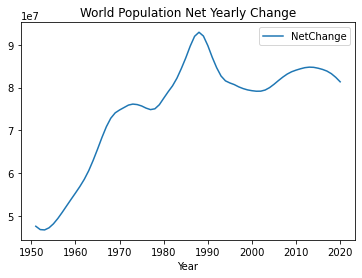

In [26]:
plt = tbl.plot(x='Year', y='NetChange', title='World Population Net Yearly Change')

In [29]:
def pct_to_num(x):
    return float(x.split()[0])

In [31]:
tbl['YearlyChange'] = tbl['YearlyChange'].apply(pct_to_num)

<ipython-input-31-d4a7d9e67118>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tbl['YearlyChange'] = tbl['YearlyChange'].apply(pct_to_num)


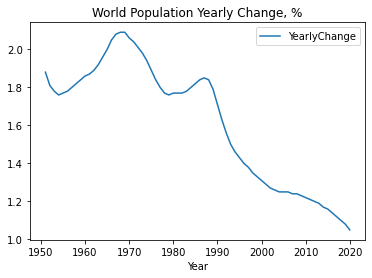

In [33]:
plt = tbl.plot(x='Year', y='YearlyChange', title='World Population Yearly Change, %')

In [34]:
tbl['UrbanNetChange'] = tbl['UrbanPop'].diff(periods=-1)

<ipython-input-34-3cfb02f9c2a0>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tbl['UrbanNetChange'] = tbl['UrbanPop'].diff(periods=-1)


In [36]:
tbl['UrbanYearlyChange'] = round(tbl['UrbanNetChange']/tbl['UrbanPop'].shift(-1)*100, 2)

<ipython-input-36-63c0ec6033d1>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tbl['UrbanYearlyChange'] = round(tbl['UrbanNetChange']/tbl['UrbanPop'].shift(-1)*100, 2)


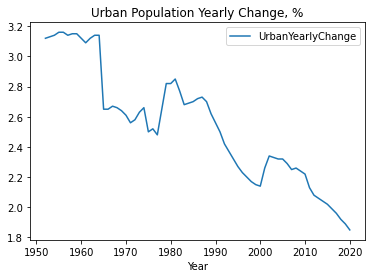

In [38]:
plt = tbl.plot(x='Year', y='UrbanYearlyChange', title='Urban Population Yearly Change, %')